<a href="https://colab.research.google.com/github/pmayd/02-Number-Wizard-Console/blob/master/dl_ch03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras

mpl.rcParams['figure.figsize'] = [15, 8.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [2]:
x = tf.ones(shape=(2,1))
print(x)

x = tf.zeros((2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.random.normal((3,1), mean=0, stddev=1)
print(x)

x = tf.random.uniform((3,1), minval=0, maxval=1)
print(x)

tf.Tensor(
[[0.6750332 ]
 [0.56678253]
 [0.7852107 ]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.32948327]
 [0.5267006 ]
 [0.49183166]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.ones((2,2,))
x[0, 0] = 0

TypeError: ignored

In [5]:
v = tf.Variable(initial_value=tf.random.normal((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.02313564],
       [-2.3105342 ],
       [-0.22129112]], dtype=float32)>


In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [0]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [12]:
input_var = tf.Variable(initial_value=3.)

with tf.GradientTape() as tape:
  result = tf.square(input_var)

gradient = tape.gradient(result, input_var)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

However, only trainable variables are being tracked by default. With a constant tensor, you'd have to manually mark it as being tracked, by calling `tape.watch()` on it

In [13]:
input_const = tf.constant(3.)

with tf.GradientTape() as tape:
  tape.watch(input_const)
  result = tf.square(input_const)

gradient = tape.gradient(result, input_const)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [15]:
time = tf.Variable(0.)

with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


## Linear Classifier
build a machine learning model based on gradient descent


In [0]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class, )
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [26]:
# stack samples together
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

inputs.shape

(2000, 2)

In [28]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), np.ones((num_samples_per_class, 1), dtype='float32')))

targets.shape

(2000, 1)

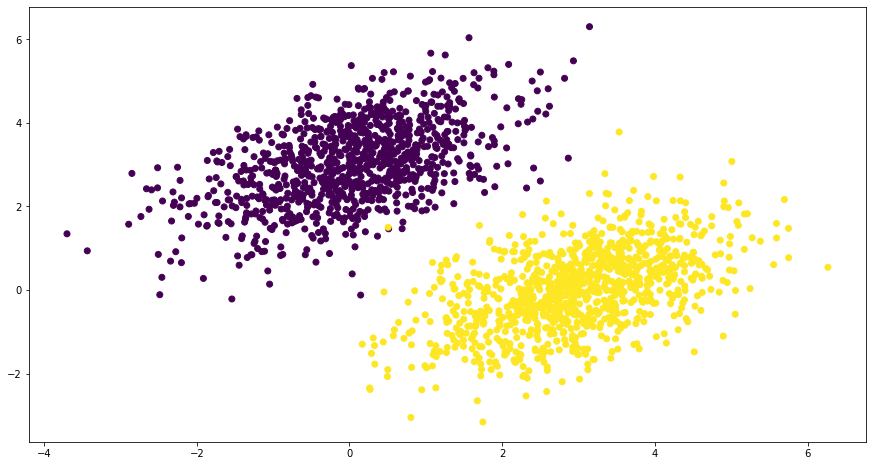

In [30]:
plt.figure(figsize=(15, 8))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

In [0]:
input_dim = 2
output_dim = 1

# model = W * input + b = y
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim, )))

In [0]:
def model(inputs):
  return tf.matmul(inputs, W) + b  # prediction = w1 * x1 + w2 * x2 + b


In [0]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)
  

In [0]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

In [37]:
epochs = 20

all_losses = []
for step in range(epochs):
  loss = training_step(inputs, targets)
  all_losses.append(loss)
  print(f'Loss at step {step}: {loss}')

Loss at step 0: 2.016547203063965
Loss at step 1: 0.19050045311450958
Loss at step 2: 0.11204060167074203
Loss at step 3: 0.09555330127477646
Loss at step 4: 0.0881846472620964
Loss at step 5: 0.08252407610416412
Loss at step 6: 0.0774981901049614
Loss at step 7: 0.07292310893535614
Loss at step 8: 0.06874212622642517
Loss at step 9: 0.06491898745298386
Loss at step 10: 0.061422787606716156
Loss at step 11: 0.05822550132870674
Loss at step 12: 0.055301565676927567
Loss at step 13: 0.05262761935591698
Loss at step 14: 0.0501822866499424
Loss at step 15: 0.047946006059646606
Loss at step 16: 0.04590092599391937
Loss at step 17: 0.04403069242835045
Loss at step 18: 0.04232034459710121
Loss at step 19: 0.0407562330365181


Text(0, 0.5, 'Loss')

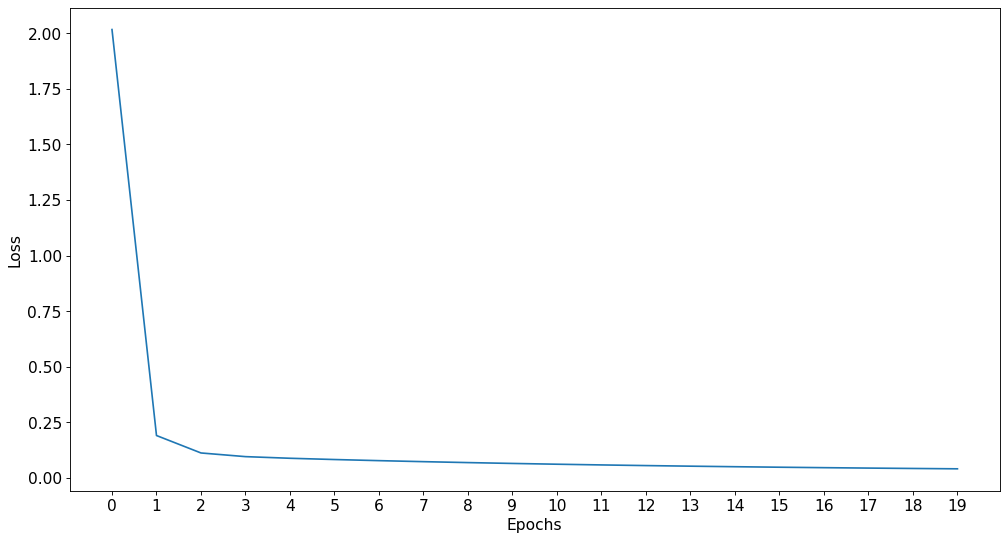

In [41]:
plt.plot(all_losses)

plt.xlabel('Epochs')
plt.xticks(range(epochs))
plt.ylabel('Loss')

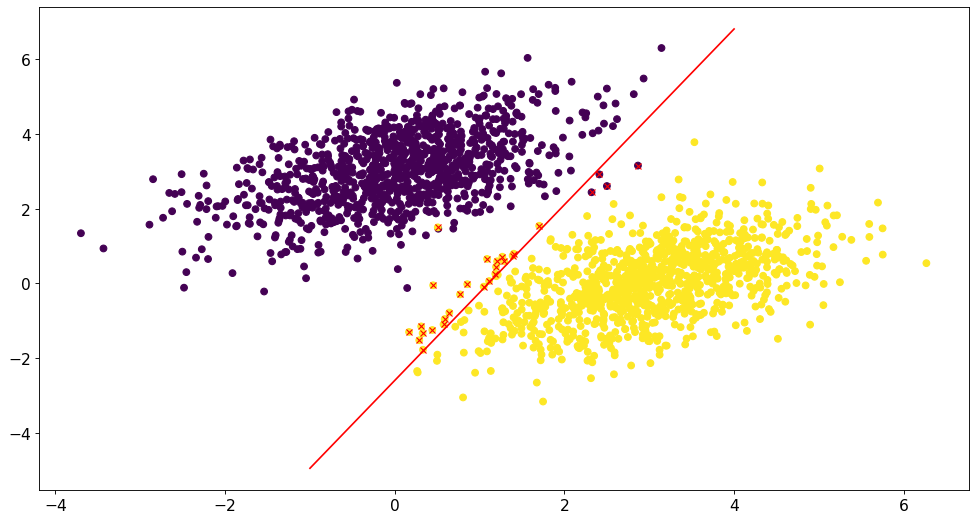

In [53]:
predictions = model(inputs)

output = np.where(predictions > 0.5, 1, 0)

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

for i, (y, y_pred) in enumerate(zip(targets, output)):
  if y != y_pred:
    plt.plot(inputs[i, 0], inputs[i, 1], marker='x', c='r')

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, '-r')


## Keras API

In [0]:
class SimpleDense(keras.layers.Layer):

  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal')
    self.b = self.add_weight(shape=(self.units, ), initializer='zeros')

  def call(self, inputs):
    y = tf.matmul(inputs, self.W) + self.b

    if self.activation is not None:
      y = self.activation(y)
    
    return y

In [61]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)

output_tensor.shape

TensorShape([2, 32])

In [0]:
layer = keras.layers.Dense(32, activation='relu')

In [0]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.RMSprop(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.BinaryAccuracy()])



Epoch 1/50
16/16 [==============================] - 0s 1ms/step - loss: 4.2744 - accuracy: 0.3890
Epoch 2/50
16/16 [==============================] - 0s 1ms/step - loss: 4.0520 - accuracy: 0.3805
Epoch 3/50
16/16 [==============================] - 0s 1ms/step - loss: 3.8708 - accuracy: 0.3745
Epoch 4/50
16/16 [==============================] - 0s 1ms/step - loss: 3.6759 - accuracy: 0.3695
Epoch 5/50
16/16 [==============================] - 0s 1ms/step - loss: 3.5223 - accuracy: 0.3695
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 3.3319 - accuracy: 0.3665
Epoch 7/50
16/16 [==============================] - 0s 1ms/step - loss: 3.1697 - accuracy: 0.3705
Epoch 8/50
16/16 [==============================] - 0s 1ms/step - loss: 3.0039 - accuracy: 0.3710
Epoch 9/50
16/16 [==============================] - 0s 1ms/step - loss: 2.8633 - accuracy: 0.3790
Epoch 10/50
16/16 [==============================] - 0s 1ms/step - loss: 2.7040 - accuracy: 0.3805
Epoch 11/50
16/16 [

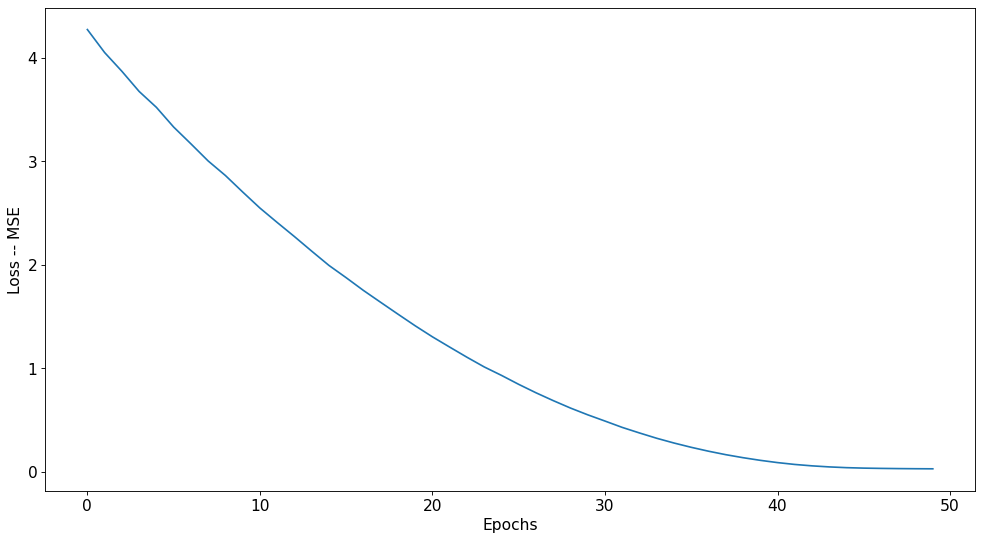

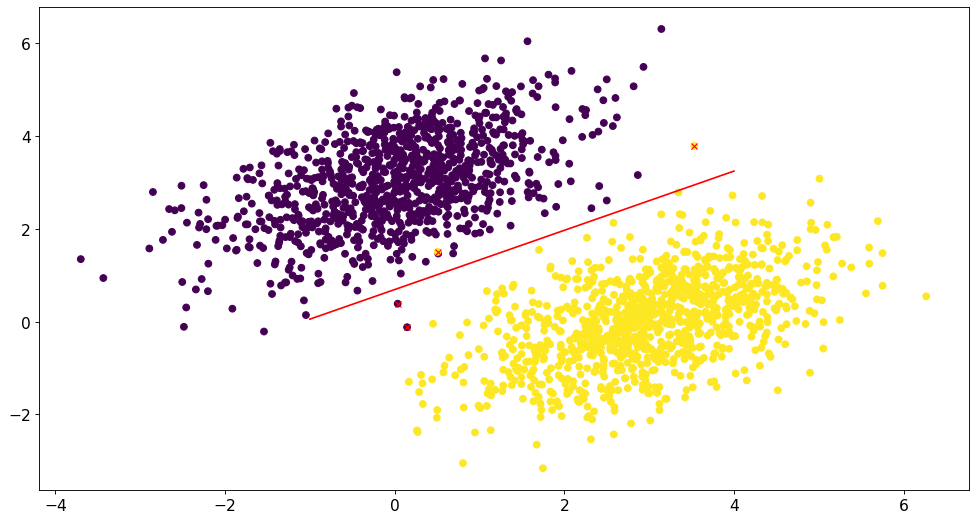

In [94]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(
    inputs,
    targets,
    epochs=50,
    batch_size=128
)

plt.figure()
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel('Loss -- MSE')

W = model.weights[0].numpy()
b = model.weights[1].numpy()

predictions = model(inputs)

output = np.where(predictions > 0.5, 1, 0)

plt.figure()
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])

for i, (y, y_pred) in enumerate(zip(targets, output)):
  if y != y_pred:
    plt.plot(inputs[i, 0], inputs[i, 1], marker='x', c='r')

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]

plt.plot(x, y, '-r')

In [76]:
history.history

{'binary_accuracy': [0.335999995470047,
  0.37599998712539673,
  0.42100000381469727,
  0.4480000138282776,
  0.4814999997615814,
  0.5184999704360962,
  0.5494999885559082,
  0.5879999995231628,
  0.6305000185966492,
  0.6675000190734863,
  0.6949999928474426,
  0.7225000262260437,
  0.7534999847412109,
  0.7760000228881836,
  0.7940000295639038,
  0.8069999814033508,
  0.8245000243186951,
  0.843999981880188,
  0.859499990940094,
  0.8755000233650208,
  0.8870000243186951,
  0.8955000042915344,
  0.9024999737739563,
  0.909500002861023,
  0.9139999747276306,
  0.9150000214576721,
  0.9204999804496765,
  0.9225000143051147,
  0.9294999837875366,
  0.9315000176429749,
  0.9365000128746033,
  0.9419999718666077,
  0.9459999799728394,
  0.9490000009536743,
  0.9524999856948853,
  0.9549999833106995,
  0.9599999785423279,
  0.9649999737739563,
  0.968500018119812,
  0.9725000262260437,
  0.9760000109672546,
  0.9779999852180481,
  0.9789999723434448,
  0.9800000190734863,
  0.981999993324

In [97]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[-num_validation_samples:]
val_targets = shuffled_targets[-num_validation_samples:]
training_inputs = shuffled_inputs[:num_validation_samples]
training_targets = shuffled_targets[:num_validation_samples]

model.fit(
  training_inputs,
  training_targets, 
  epochs=5, 
  batch_size=16, 
  validation_data=(val_inputs, val_targets)
)

Epoch 1/5
38/38 [==============================] - 0s 6ms/step - loss: 0.1675 - binary_accuracy: 0.9733 - val_loss: 0.2242 - val_binary_accuracy: 0.9683
Epoch 2/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0710 - binary_accuracy: 0.9617 - val_loss: 0.0424 - val_binary_accuracy: 0.9900
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 0.0714 - binary_accuracy: 0.9717 - val_loss: 0.3024 - val_binary_accuracy: 0.6833
Epoch 4/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0694 - binary_accuracy: 0.9583 - val_loss: 0.1959 - val_binary_accuracy: 0.8033
Epoch 5/5
38/38 [==============================] - 0s 3ms/step - loss: 0.0675 - binary_accuracy: 0.9650 - val_loss: 0.0899 - val_binary_accuracy: 0.9133


In [99]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, 128)

loss_and_metrics

5/5 [==============================] - 0s 2ms/step - loss: 0.0904 - binary_accuracy: 0.9133


[0.09042946249246597, 0.9133333563804626]

In [102]:
model.predict(val_inputs, batch_size=128)

array([[ 9.46808577e-01],
       [-3.24547172e-01],
       [ 1.09559745e-01],
       [-2.30076313e-02],
       [-2.15252221e-01],
       [-2.27010310e-01],
       [ 6.58767879e-01],
       [ 6.06619716e-02],
       [ 2.53179014e-01],
       [ 1.04772687e-01],
       [-3.98513079e-02],
       [-3.39947224e-01],
       [ 1.01826215e+00],
       [ 2.83147097e-01],
       [-2.48204470e-02],
       [ 2.23749340e-01],
       [ 6.89339876e-01],
       [-2.89817274e-01],
       [ 4.20066118e-02],
       [ 9.90905464e-02],
       [ 9.26501155e-02],
       [ 9.28380609e-01],
       [ 8.30671310e-01],
       [ 7.71332383e-01],
       [ 2.52544820e-01],
       [-8.27589035e-02],
       [-1.32756054e-01],
       [-2.05277801e-01],
       [ 2.17491984e-02],
       [ 4.62609649e-01],
       [ 4.68074352e-01],
       [-3.22206855e-01],
       [ 7.89006650e-01],
       [ 6.34838104e-01],
       [ 2.41935253e-04],
       [ 5.12799621e-01],
       [ 7.43230939e-01],
       [-4.67271209e-02],
       [ 6.0

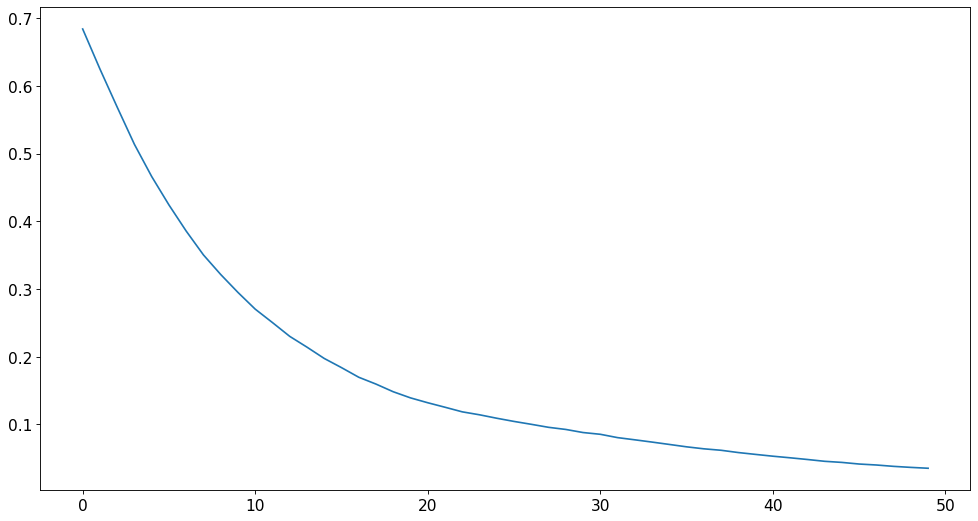

In [78]:
plt.plot(history.history['loss'])

In [89]:
model.weights[0].numpy()

array([[ 0.19779396],
       [-0.10324071]], dtype=float32)